I will use the codes of this page:
https://python.quantecon.org/rational_expectations.html

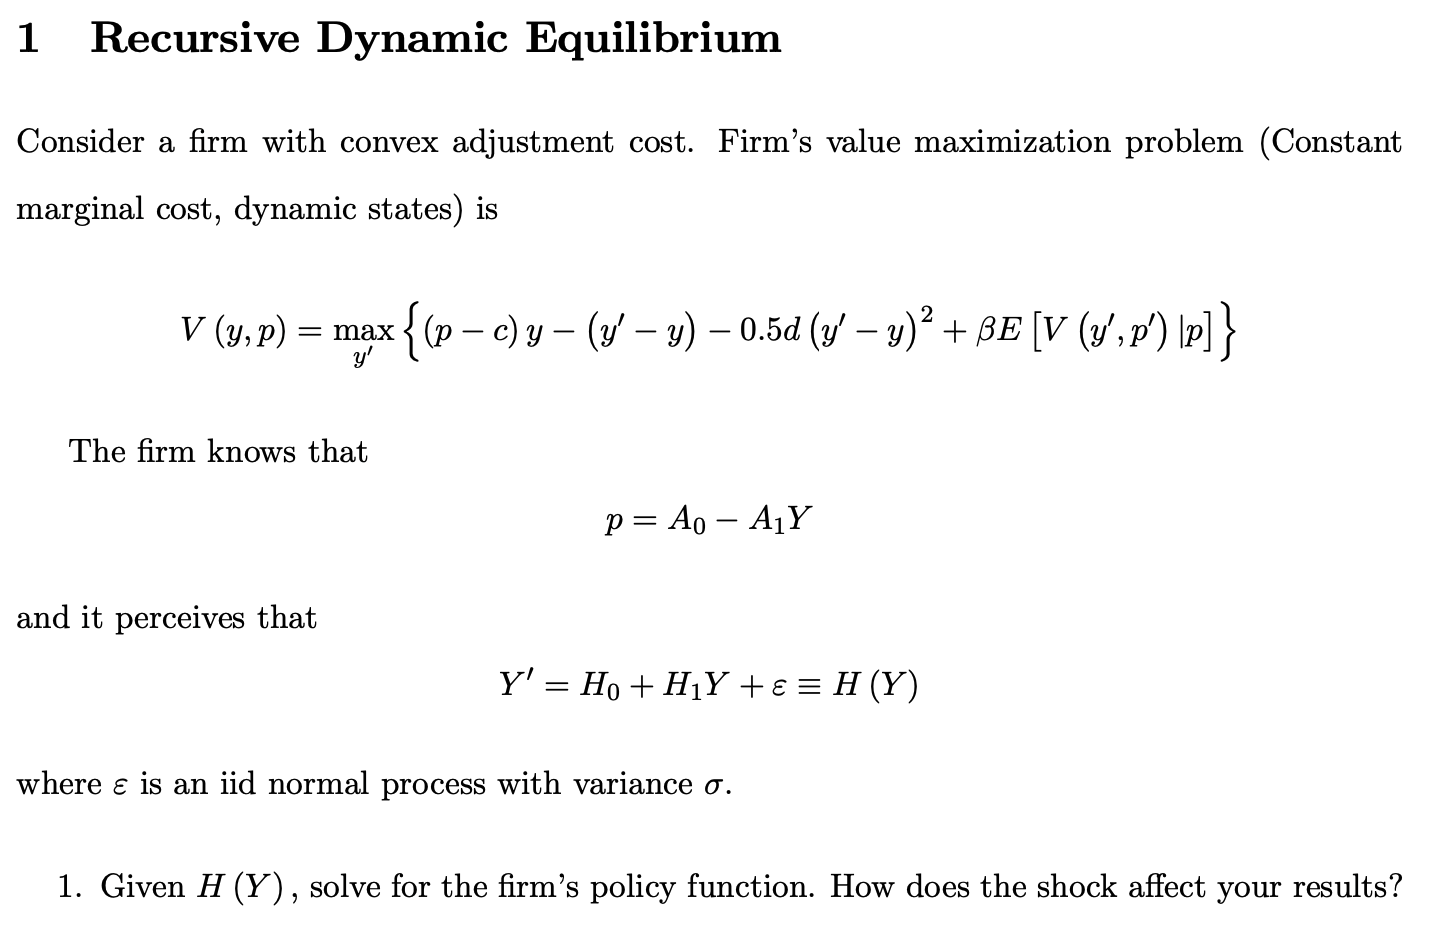

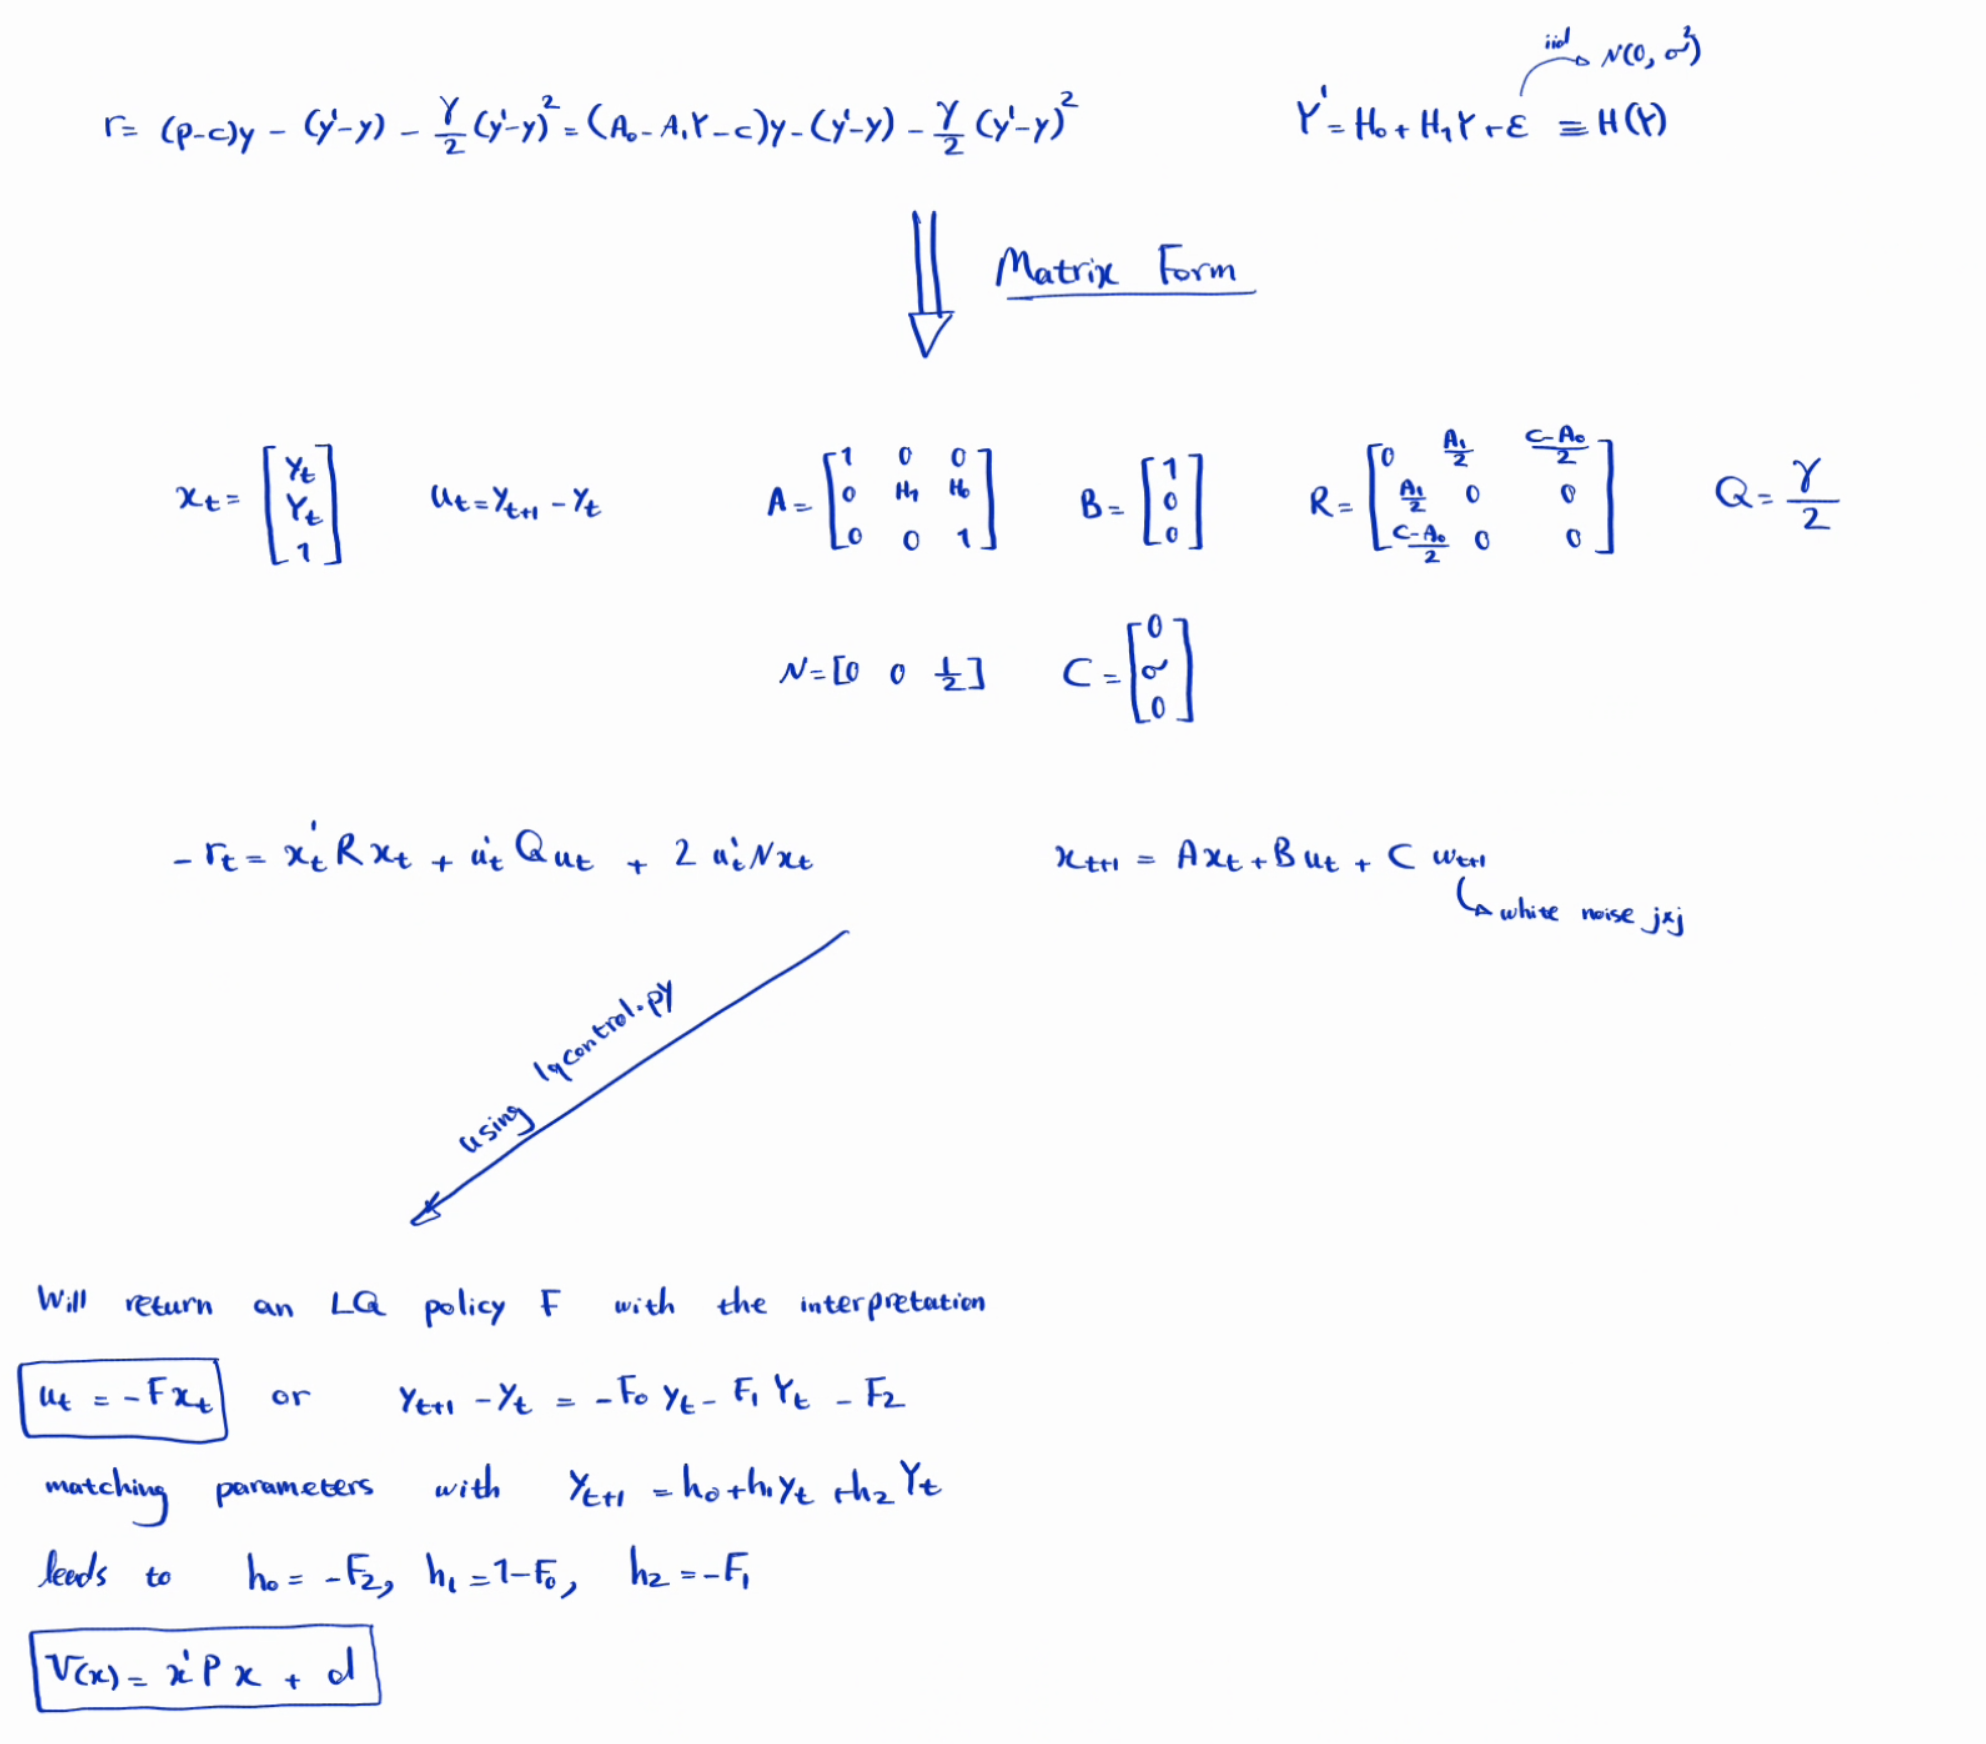

In [1]:
# !pip install quantecon

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import seaborn as sns
import numpy as np
import pandas as pd
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

from quantecon import LQ

In [2]:
# Model parameters
A0 = 100
A1 = 0.05
β = 0.95
γ = 10.0 # it's the d in the question
c = 10
σ = 5

# Beliefs
H0 = 95.5
H1 = 0.95

# Formulate the LQ problem
A = np.array([[1, 0, 0], [0, H1, H0], [0, 0, 1]])
B = np.array([1, 0, 0]).reshape((3, 1))
C = np.array([0, σ, 0]).reshape((3, 1))
R = np.array([[0, A1/2, (c-A0)/2], [A1/2, 0, 0], [(c-A0)/2, 0, 0]])
N = np.array([0, 0, 1/2]).reshape((1, 3))
Q = 0.5 * γ

# Solve for the optimal policy using quantecon.LQ
# https://quanteconpy.readthedocs.io/en/latest/tools/lqcontrol.html
lq = LQ(Q=Q, R=R, A=A, B=B, C=C, N=N, beta=β)
P, F, d = lq.stationary_values()
F = F.flatten()
print(f"F (policy function) = {F}")
h0, h1, h2 = -F[2], 1 - F[0], -F[1]
print(f"(h0, h1, h2) = ({h0:.3f}, {h1:.3f}, {h2:.3f})")
print("\nValue Function:")
print(f"d = {d:.3f}")
print(f"P = {P}")

F (policy function) = [ -0.       0.0463 -77.8487]
(h0, h1, h2) = (77.849, 1.000, -0.046)

Value Function:
d = -35.669
P = [[     -0.           0.2564    -434.7436]
 [      0.2564      -0.0751     118.3879]
 [   -434.7436     118.3879 -189425.1342]]


In [3]:
# Model parameters
A0 = 100
A1 = 0.05
β = 0.95
γ = 10.0 # it's the d in the question
c = 10
σ = 50

# Beliefs
H0 = 95.5
H1 = 0.95

# Formulate the LQ problem
A = np.array([[1, 0, 0], [0, H1, H0], [0, 0, 1]])
B = np.array([1, 0, 0]).reshape((3, 1))
C = np.array([0, σ, 0]).reshape((3, 1))
R = np.array([[0, A1/2, (c-A0)/2], [A1/2, 0, 0], [(c-A0)/2, 0, 0]])
N = np.array([0, 0, 1/2]).reshape((1, 3))
Q = 0.5 * γ

# Solve for the optimal policy using quantecon.LQ
# https://quanteconpy.readthedocs.io/en/latest/tools/lqcontrol.html
lq = LQ(Q=Q, R=R, A=A, B=B, C=C, N=N, beta=β)
P, F, d = lq.stationary_values()
F = F.flatten()
print(f"F (policy function) = {F}")
h0, h1, h2 = -F[2], 1 - F[0], -F[1]
print(f"(h0, h1, h2) = ({h0:.3f}, {h1:.3f}, {h2:.3f})")
print("\nValue Function:")
print(f"d = {d:.3f}")
print(f"P = {P}")

F (policy function) = [ -0.       0.0463 -77.8487]
(h0, h1, h2) = (77.849, 1.000, -0.046)

Value Function:
d = -3566.918
P = [[     -0.           0.2564    -434.7436]
 [      0.2564      -0.0751     118.3879]
 [   -434.7436     118.3879 -189425.1342]]


### As you see increasing the variance of shock (σ) has no effect on F (policy function) and P. It only lowers the intercept of the Value function (d).

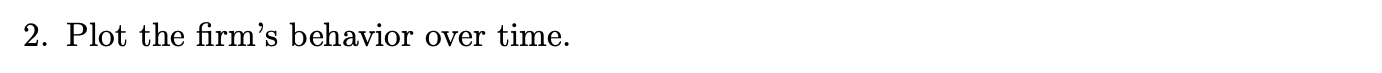

In [4]:
n = 1

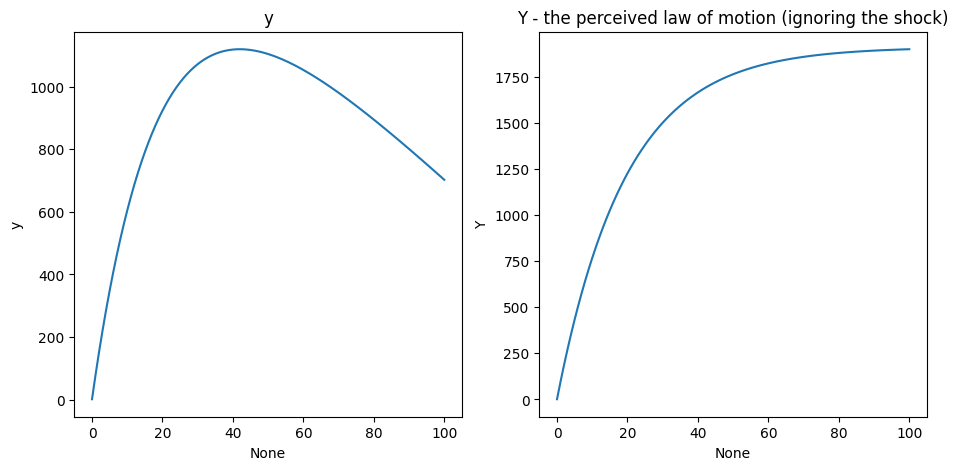

In [5]:
# Here we will use the perceived law of motion (ignoring the shock) and the policy function to plot the Firms behavior over time.

x = np.array([1, n, 1]).reshape((3, 1))
x_history = [x.flatten()]
for _ in range(100):
    u = (-F@x).reshape((1,1))
    x_prime = A@x + B@u
    x = x_prime
    x_history.append(x.flatten())
    
x_history = pd.DataFrame(x_history)
x_history.columns = ['y', 'Y', '1']

fig, axs = plt.subplots(ncols=2, nrows=1)
sns.lineplot(x=x_history.index, y=x_history.y, ax=axs[0]).set(title='y')
sns.lineplot(x=x_history.index, y=x_history.Y, ax=axs[1]).set(title='Y - the perceived law of motion (ignoring the shock)');

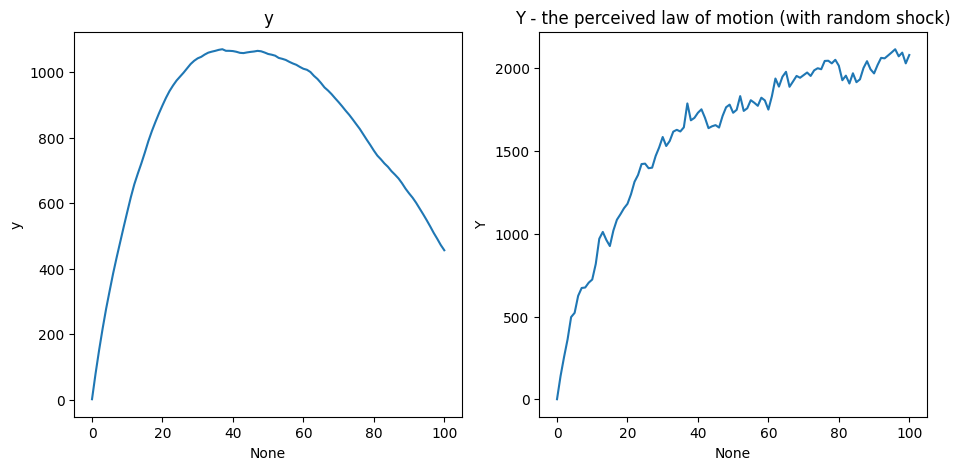

In [6]:
# Here we will use the perceived law of motion (with random shock) and the policy function to plot the Firms behavior over time.
np.random.seed(1404)
x = np.array([1, n, 1]).reshape((3, 1))
x_history = [x.flatten()]
for _ in range(100):
    u = (-F@x).reshape((1,1))
    x_prime = A@x + B@u + (C * np.random.normal())
    x = x_prime
    x_history.append(x.flatten())
    
x_history = pd.DataFrame(x_history)
x_history.columns = ['y', 'Y', '1']

fig, axs = plt.subplots(ncols=2, nrows=1)
sns.lineplot(x=x_history.index, y=x_history.y, ax=axs[0]).set(title='y')
sns.lineplot(x=x_history.index, y=x_history.Y, ax=axs[1]).set(title='Y - the perceived law of motion (with random shock)');

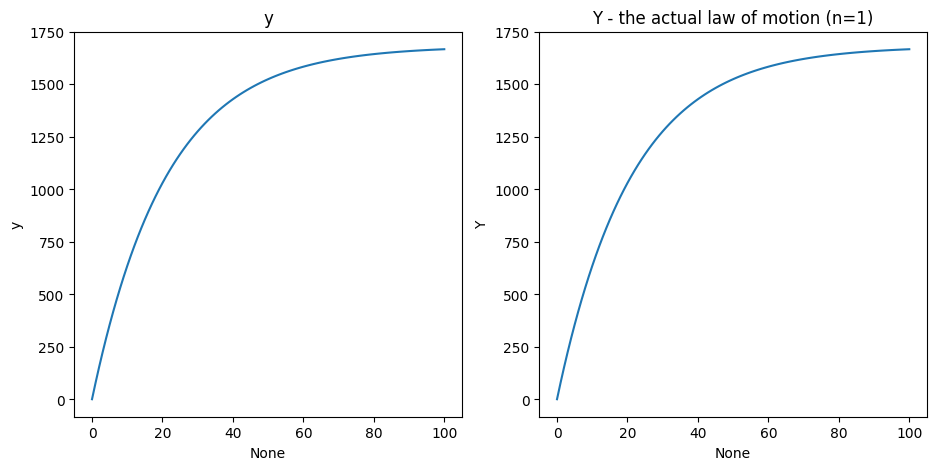

In [7]:
# Here we will use the actual law of motion (n=1) and the policy function to plot the Firms behavior over time.

x = np.array([1, n, 1]).reshape((3, 1))
x_history = [x.flatten()]
for _ in range(100):
    u = (-F@x).reshape((1,1))
    x_prime = A@x + B@u
    x_prime[1] = x_prime[0] * n # actual law of motion
    x = x_prime
    x_history.append(x.flatten())
    
x_history = pd.DataFrame(x_history)
x_history.columns = ['y', 'Y', '1']

fig, axs = plt.subplots(ncols=2, nrows=1)
sns.lineplot(x=x_history.index, y=x_history.y, ax=axs[0]).set(title='y')
sns.lineplot(x=x_history.index, y=x_history.Y, ax=axs[1]).set(title='Y - the actual law of motion (n=1)');

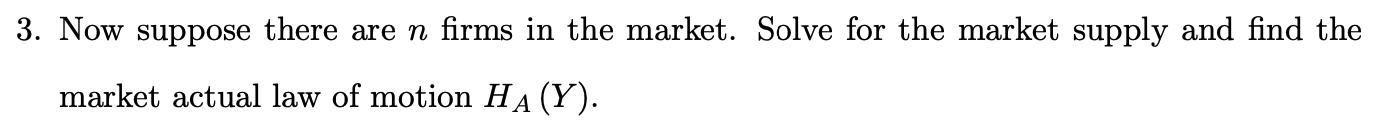

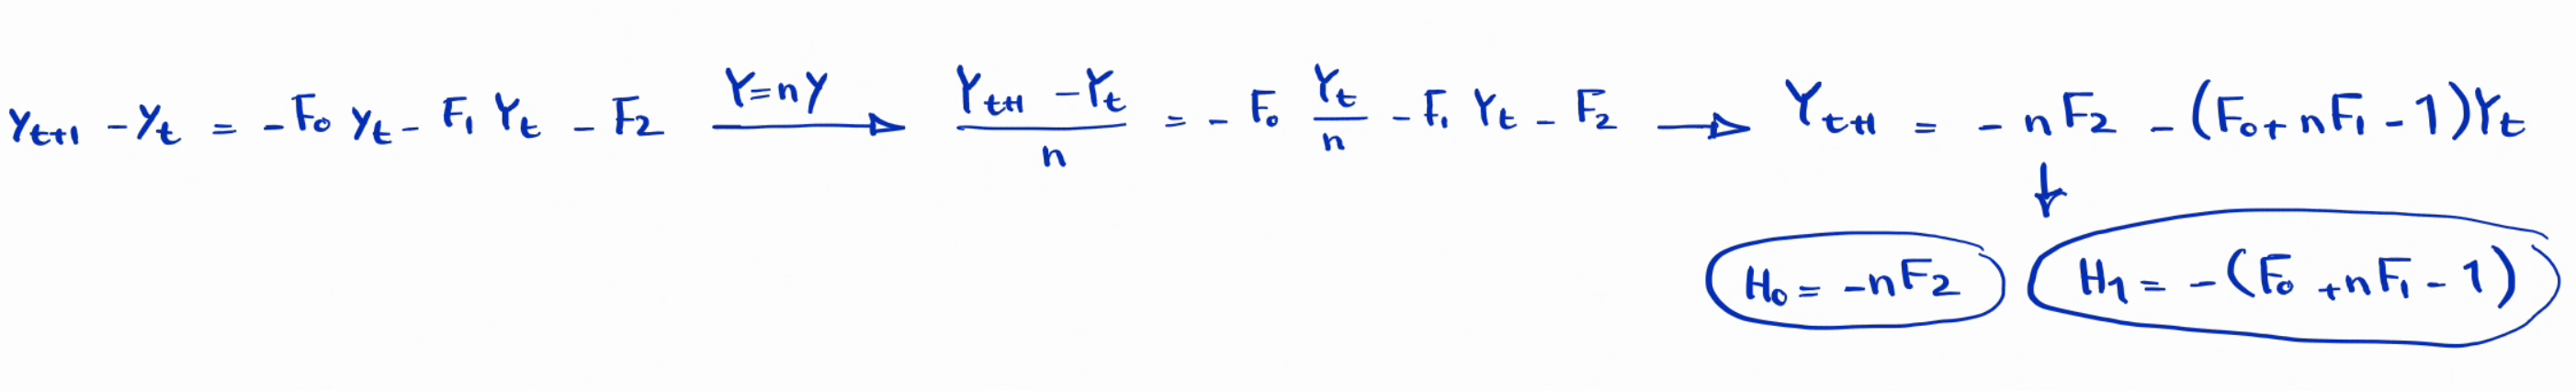

In [8]:
print(f"Actual law of motion is Y' = -n*F2 - (F0 + n*F1 - 1) Y")
print(f"Actual law of motion is Y' = {-n*F[2]} + {-(F[0] + n*F[1] - 1)} Y")

Actual law of motion is Y' = -n*F2 - (F0 + n*F1 - 1) Y
Actual law of motion is Y' = 77.84871794868366 + 0.9537179487179449 Y


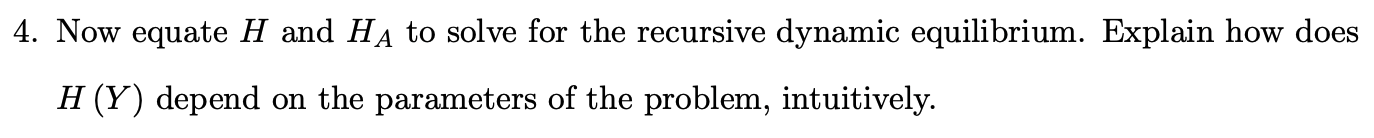

In [9]:
# Model parameters
A0 = 100
A1 = 0.05
β = 0.95
γ = 10.0
c = 10
σ = 50

# Beliefs
n = 1
H0 = 95.5
H1 = 0.95

for i in range(10_000):
    A = np.array([[1, 0, 0], [0, H1, H0], [0, 0, 1]])
    B = np.array([1, 0, 0]).reshape((3, 1))
    C = np.array([0, σ, 0]).reshape((3, 1))
    R = np.array([[0, A1/2, (c-A0)/2], [A1/2, 0, 0], [(c-A0)/2, 0, 0]])
    N = np.array([0, 0, 1/2]).reshape((1, 3))
    Q = 0.5 * γ
    
    # Solve for the optimal policy using quantecon.LQ
    # https://quanteconpy.readthedocs.io/en/latest/tools/lqcontrol.html
    
    lq = LQ(Q=Q, R=R, A=A, B=B, C=C, N=N, beta=β)
    P, F, d = lq.stationary_values()
    F = F.flatten()
    actual_H0 = -n*F[2]
    actual_H1 = -(F[0] + n*F[1] - 1)
    if (np.abs(actual_H0 - H0) < 0.0001) and (np.abs(actual_H1 - H1) < 0.0001):
        print(f'Converged in {i} iterations')
        break
    H0, H1 = actual_H0, actual_H1
print(f"H0: {H0:.4f} H1: {H1:.4f}")
print(f"Recursive law of motion is Y' = {H0:.4f} + {H1:.4f} Y")

Converged in 6731 iterations
H0: 85.5236 H1: 0.9525
Recursive law of motion is Y' = 85.5236 + 0.9525 Y


### I guess that:
- If d decreases toward zero (no adjustment cost), then y will converge very fast to the steady-state value. So H0 will increase to the ss Y, and H1 will decrease toward zero. H will be like a contant function.
- If c increases or A0 decreases, then the steady state Y will be lower. So I expect both H0 and H1 to decrease. However, running the code shows that only H0 decreases.
- If A1 increases (price decreases faster as Y increases), then H1 might decrease and the steady state Y will be lower. However, running the code shows that both H0 and H1 increase!
- If β increases and firms get more patient, the steady state Y will be higher. So I expect both H0 and H1 to increase. However, running the code shows that H0 increases but H1 decreases.
- sigma has no effect on H.

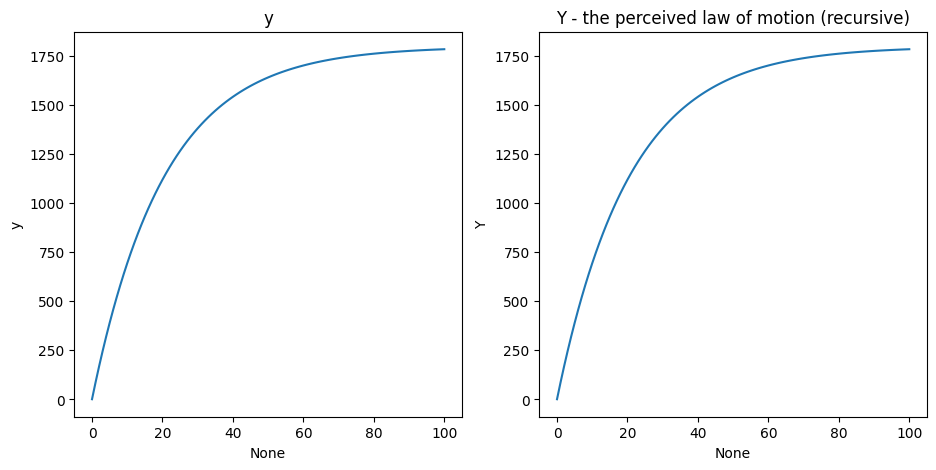

In [10]:
# Here we will use the perceived law of motion (ignoring the shock) and the policy function to plot the Firms behavior over time.

x = np.array([1, n, 1]).reshape((3, 1))
x_history = [x.flatten()]
for _ in range(100):
    u = (-F@x).reshape((1,1))
    x_prime = A@x + B@u
    x = x_prime
    x_history.append(x.flatten())
    
x_history = pd.DataFrame(x_history)
x_history.columns = ['y', 'Y', '1']

fig, axs = plt.subplots(ncols=2, nrows=1)
sns.lineplot(x=x_history.index, y=x_history.y, ax=axs[0]).set(title='y')
sns.lineplot(x=x_history.index, y=x_history.Y, ax=axs[1]).set(title='Y - the perceived law of motion (recursive)');

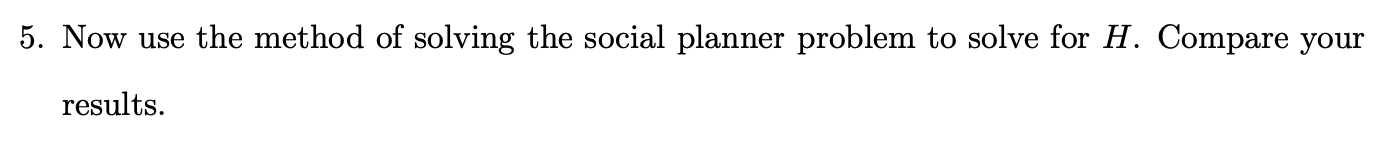

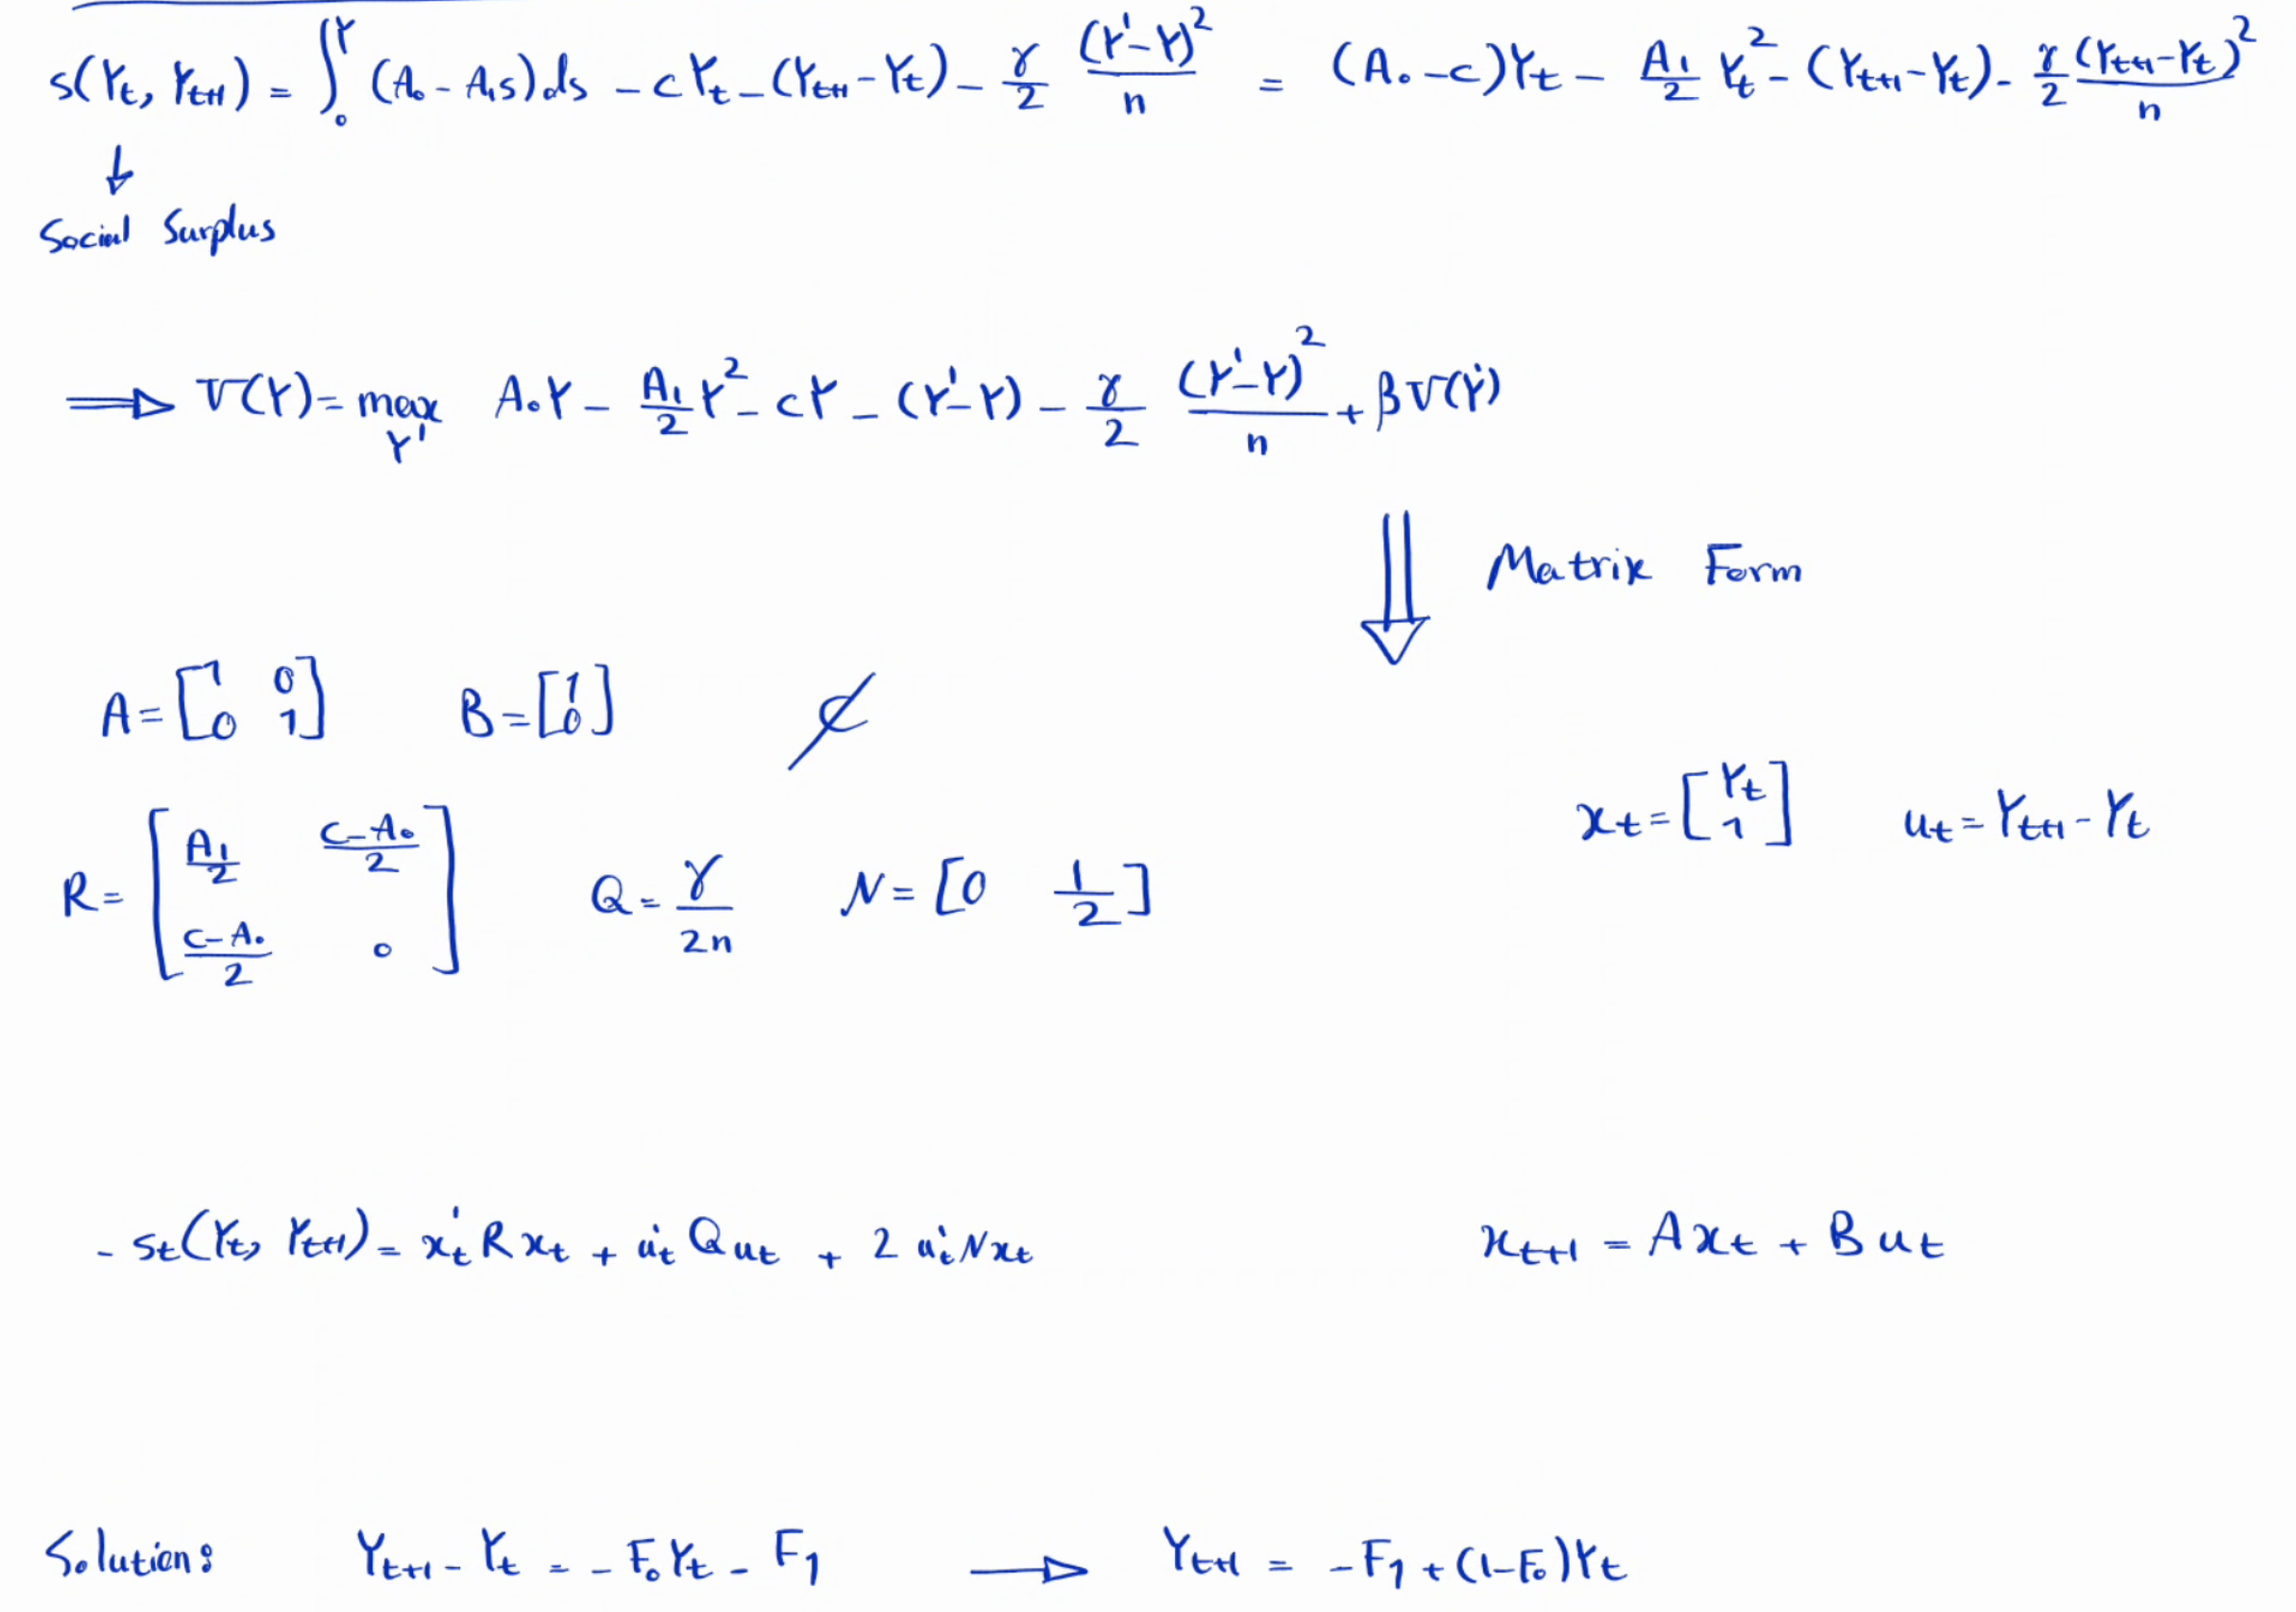

In [11]:
# Model parameters
A0 = 100
A1 = 0.05
β = 0.95
γ = 10.0
c = 10
σ = 50
n = 1

# Formulate the LQ problem
A = np.array([[1, 0], [0, 1]])
B = np.array([1, 0]).reshape((2, 1))
R = np.array([[A1/2, (c-A0)/2], [(c-A0)/2, 0]])
N = np.array([0, 1/2]).reshape((1, 2))
Q = 0.5 * γ / n

# Solve for the optimal policy using quantecon.LQ
lq = LQ(Q=Q, R=R, A=A, B=B, N=N, beta=β)
P, F, d = lq.stationary_values()
F = F.flatten()
print(f"F (policy function) = {F}")
print(f"Social Planner law of motion is Y' = {-F[1]:.4f} + {-(F[0] - 1):.4f} Y")

F (policy function) = [  0.0475 -85.5236]
Social Planner law of motion is Y' = 85.5236 + 0.9525 Y


### The Social Planner law of motion (Y' = 85.5236 + 0.9525 Y) is the same as the Recursive law of motion (Y' = 85.5236 + 0.9525 Y)

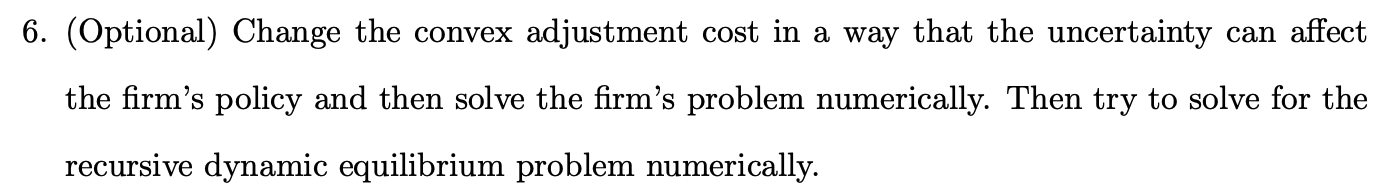

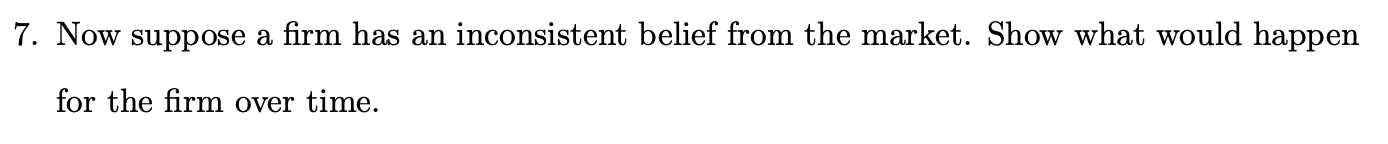

Lifetime welfare with inconsistent belief = 260500.36344345048


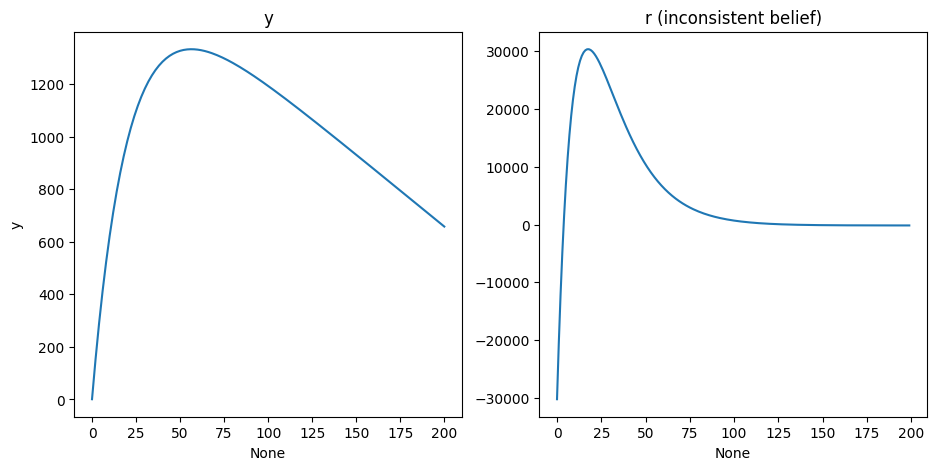

In [12]:
# Inconsistent Belief about law of motion
H0 = 95.5
H1 = 0.95

# Actual law of motion
actual_H0 = 85.5236
actual_H1 = 0.9525

# Formulate the LQ problem
A = np.array([[1, 0, 0], [0, H1, H0], [0, 0, 1]])
actual_A = np.array([[1, 0, 0], [0, actual_H1, actual_H0], [0, 0, 1]])
B = np.array([1, 0, 0]).reshape((3, 1))
C = np.array([0, σ, 0]).reshape((3, 1))
R = np.array([[0, A1/2, (c-A0)/2], [A1/2, 0, 0], [(c-A0)/2, 0, 0]])
N = np.array([0, 0, 1/2]).reshape((1, 3))
Q = 0.5 * γ

# Solve for the optimal policy using quantecon.LQ
lq = LQ(Q=Q, R=R, A=A, B=B, C=C, N=N, beta=β)
P, F, d = lq.stationary_values()
F = F.flatten()


x = np.array([1, n, 1]).reshape((3, 1))
x_history = [x.flatten()]
r_history = []
for _ in range(200):
    u = (-F@x)
    p = A0 - A1 * x[1]
    r = (p - c) * x[0] - u - γ / 2 * u**2
    r_history.append(r[0])
    u = u.reshape((1,1))
    
    x_prime = actual_A@x + B@u
    x = x_prime
    x_history.append(x.flatten())
    
x_history = pd.DataFrame(x_history)
x_history.columns = ['y', 'Y', '1']

fig, axs = plt.subplots(ncols=2, nrows=1)
sns.lineplot(x=x_history.index, y=x_history.y, ax=axs[0]).set(title='y')
sns.lineplot(x=x_history.index[:-1], y=r_history, ax=axs[1]).set(title='r (inconsistent belief)')

print(f'Lifetime welfare with inconsistent belief = {(np.array(r_history) * β ** np.arange(200)).sum()}')

Lifetime welfare with consistent belief = 264830.5758417118


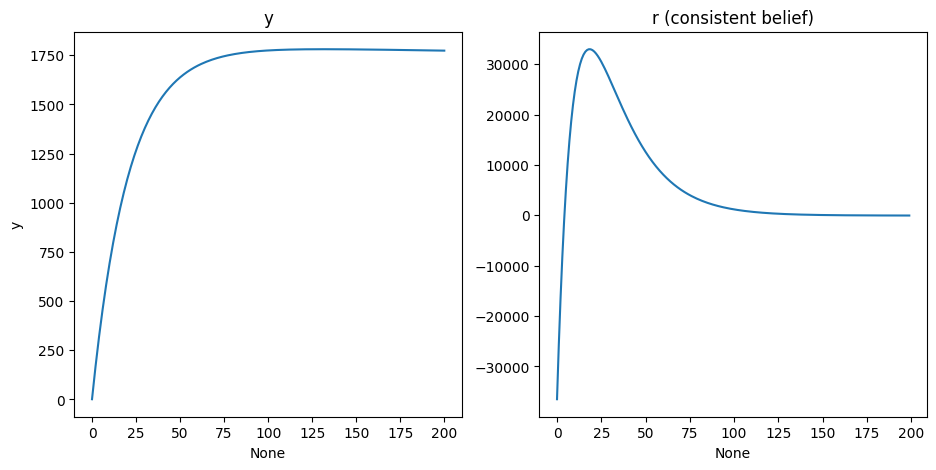

In [13]:
# Inconsistent Belief about law of motion
H0 = 85.5236
H1 = 0.9525

# Actual law of motion
actual_H0 = 85.5236
actual_H1 = 0.9525

# Formulate the LQ problem
A = np.array([[1, 0, 0], [0, H1, H0], [0, 0, 1]])
actual_A = np.array([[1, 0, 0], [0, actual_H1, actual_H0], [0, 0, 1]])
B = np.array([1, 0, 0]).reshape((3, 1))
C = np.array([0, σ, 0]).reshape((3, 1))
R = np.array([[0, A1/2, (c-A0)/2], [A1/2, 0, 0], [(c-A0)/2, 0, 0]])
N = np.array([0, 0, 1/2]).reshape((1, 3))
Q = 0.5 * γ

# Solve for the optimal policy using quantecon.LQ
lq = LQ(Q=Q, R=R, A=A, B=B, C=C, N=N, beta=β)
P, F, d = lq.stationary_values()
F = F.flatten()


x = np.array([1, n, 1]).reshape((3, 1))
x_history = [x.flatten()]
r_history = []
for _ in range(200):
    u = (-F@x)
    p = A0 - A1 * x[1]
    r = (p - c) * x[0] - u - γ / 2 * u**2
    r_history.append(r[0])
    u = u.reshape((1,1))
    
    x_prime = actual_A@x + B@u
    x = x_prime
    x_history.append(x.flatten())
    
x_history = pd.DataFrame(x_history)
x_history.columns = ['y', 'Y', '1']

fig, axs = plt.subplots(ncols=2, nrows=1)
sns.lineplot(x=x_history.index, y=x_history.y, ax=axs[0]).set(title='y')
sns.lineplot(x=x_history.index[:-1], y=r_history, ax=axs[1]).set(title='r (consistent belief)')

print(f'Lifetime welfare with consistent belief = {(np.array(r_history) * β ** np.arange(200)).sum()}')

### Lifetime welfare with consistent belief (264830) is more than Lifetime welfare with inconsistent belief (260500)